# Análisis de los datos

In [65]:
# importar librerias necesarias
import pandas as pd # para manejar dataframes
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_data = pd.read_csv('../csvFiles/raw_pacientes.csv', dtype=object)

In [3]:
df_data.head()

SubjectID DateID GestureLabel RepetitionNumber CorrectLabel Position  \
0       101     18            0                1            1    stand   
1       101     18            0                1            1    stand   
2       101     18            0                1            1    stand   
3       101     18            0                1            1    stand   
4       101     18            0                1            1    stand   

      JointName TrackedStatus        3D_X        3D_Y      3D_Z      2D_X  \
0     SpineBase       Tracked  -0.1028086  0.06965441  2.464606   243.133   
1      SpineMid       Tracked  -0.1026228   0.3837799  2.438919   242.971   
2          Neck       Tracked  -0.1025293   0.6877351   2.40196  242.6967   
3          Head       Tracked  -0.1190992   0.8358598  2.373549  239.9086   
4  ShoulderLeft       Tracked  -0.2826451   0.5525576   2.38421  214.7496   

       2D_Y  
0  196.5854  
1  149.1077  
2  101.3569  
3  76.90204  
4   121.544

## 1. Posición a través de t

Posición de la muñeca de una persona sana (102) vs un paciente (id: 206) realizando una flexión de hombro

In [4]:
def repetition_graph(df:pd.DataFrame):
    groups = df.groupby("RepetitionNumber")
 
    for name, group in groups:
        spinBase = group[group['JointName']=='SpineBase']['3D_X']
        WristRight = group[group['JointName']=='WristRight']['3D_X']
        normalize_gesture = WristRight.values - spinBase.values
        plt.plot(normalize_gesture, label = "repetition "+ str(name))


In [5]:
def extraer_persona(df:pd.DataFrame, id:str, id_gesture:str):
    conditions = (df['SubjectID'] == id) & (df['GestureLabel'] == id_gesture)  & (df['Position'] =='stand')
    persona = df[conditions]
    persona = persona.apply(lambda x: pd.to_numeric(x, errors = 'ignore'))
    return persona

In [6]:
persona_sana = extraer_persona(df_data, '102', '2')
paciente_206 = extraer_persona(df_data, '206', '2')

C:\Users\nerea\AppData\Local\Temp\ipykernel_12540\1154384310.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  persona = persona.apply(lambda x: pd.to_numeric(x, errors = 'ignore'))


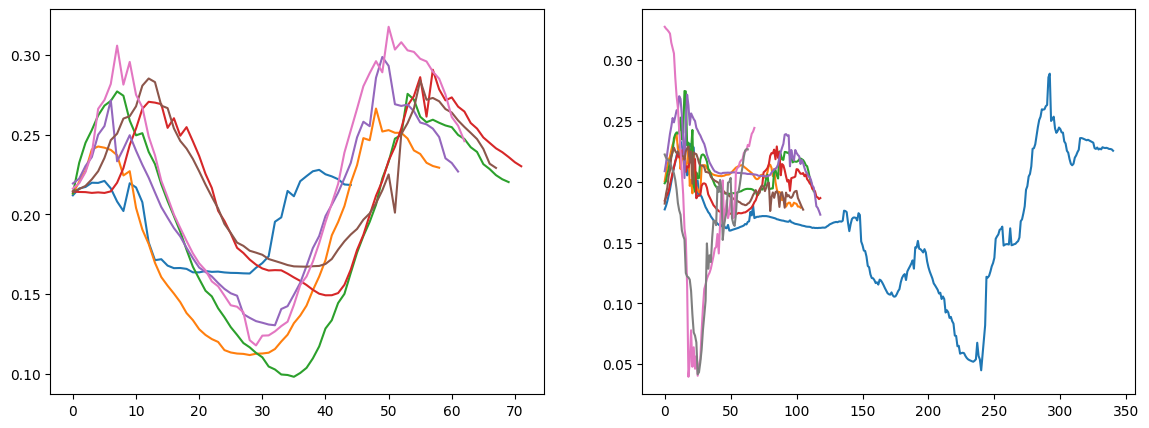

In [7]:
fig = plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
repetition_graph(persona_sana)

plt.subplot(1, 2, 2)
repetition_graph(paciente_206)

plt.show()

## 2. Numero de correctas e incorrectas

## 3. Calcular los ángulos

<div>
<img src="../images/gestures.png" width="500"/>
</div>

In [68]:
def calculate_angle(df:pd.DataFrame,joint_a:str,joint_b:str,joint_c:str):
    a = df.loc[df['JointName'] == joint_a, ['3D_X', '3D_Y']].values.astype('float')
    b = df.loc[df['JointName'] == joint_b, ['3D_X', '3D_Y']].values.astype('float')
    c = df.loc[df['JointName'] == joint_c, ['3D_X', '3D_Y']].values.astype('float')

  
    # cacular los radianes y el angulo
    # los [1] representan las y y los [0] las x
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    # para tener un maximo de 180 grados
    angle = np.where(angle > 180.0, 360 - angle, angle)
        
    return angle 

Key point necesarios para calccular el ángulo de cada movimiento

In [70]:

groups = df_data.groupby(['SubjectID', 'GestureLabel', 'RepetitionNumber', 'CorrectLabel'])
angle_data = []
joint = []
for key, values in groups:
    
    angle_data.append({
            'SubjectID': key[0],
            'GestureLabel': key[1],
            'RepetitionNumber': key[2],
            'CorrectLabel': key[3]
            })
    
    print(calculate_angle(values, 'ShoulderLeft', 'ElbowLeft', 'WristLeft'))

pd.DataFrame(angle_data)


KeyboardInterrupt: 

In [24]:
print(joint)

[     SubjectID DateID GestureLabel RepetitionNumber CorrectLabel Position  \
0          101     18            0                1            1    stand   
1          101     18            0                1            1    stand   
2          101     18            0                1            1    stand   
3          101     18            0                1            1    stand   
4          101     18            0                1            1    stand   
...        ...    ...          ...              ...          ...      ...   
1470       101     18            0                1            1    stand   
1471       101     18            0                1            1    stand   
1472       101     18            0                1            1    stand   
1473       101     18            0                1            1    stand   
1474       101     18            0                1            1    stand   

          JointName TrackedStatus        3D_X        3D_Y      3D_Z      2